## Feature engineering and scaling

Previous classes have done justification to important machine learning concepts (building model, statistical analysis, handling missing features and categorical columns) we need to understand. So, i'll skip those explanations throughout this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from scipy.stats import skew

pd.set_option('display.max_columns', None)

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
data = pd.concat([train.drop("SalePrice", axis=1),test], axis=0) #Join train and test dataset
y = train[['SalePrice']]

In [4]:
#Drop features with high missing values(over 80%)
high_missing_cols = ['PoolQC', 'MiscFeature', 'Alley', 'Fence',]
data = data.drop(high_missing_cols, axis=1)

In [5]:
# I'll drop some features due to multicollinearity, low class representation, etc
to_drop = ['Id', 'YrSold', 'MoSold', 'Utilities', 'Street', 'Condition2', 'RoofMatl', 'Heating',
           'LowQualFinSF', '3SsnPorch', 'PoolArea', 'MiscVal']
data = data.drop(to_drop, axis=1)


In [6]:
#Get list of categorical features
categorical_cols = data.select_dtypes(include=['object']).columns
categorical_cols

Index(['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
       'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual',
       'GarageCond', 'PavedDrive', 'SaleType', 'SaleCondition'],
      dtype='object')

In [7]:
# Get list of numeric columns
numeric_cols = data.select_dtypes(include=np.number).columns
numeric_cols

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea',
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
       'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', 'ScreenPorch'],
      dtype='object')

**Handling missing values**

In [8]:
#Replace NaN with none.
none_cols = ['FireplaceQu', 'GarageType','GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual',
             'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType']
for col in none_cols:
    data[col].replace(np.nan, 'None', inplace=True)

In [9]:
#Fill missing categorical columns with the mode
data[categorical_cols] = data[categorical_cols].fillna(data[categorical_cols].mode().iloc[0])

In [10]:
# Handle missing values
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
#Handle numeric missing values
data[numeric_cols] = imputer.fit_transform(data[numeric_cols])

**Encoding categorical features**

In [11]:
# Label encode categorical features
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
for col in categorical_cols:
    data[col] = encoder.fit_transform(data[col])

In [12]:
data.isna().sum().any() #Check if missing value(s) exists

False

### What are features?
Features are also known as predictors or independent Variables.
Using the housing price prediction dataset, each column represents a feature  and they contribute their quota  towards the model performance. They are: LotArea, YearBuilt, FullBath, etc
Features must be informative enough for the model to make a reasonable prediction. If our dataset
contains too many features that are irrelevant, the model performance will not be optimal.

### Feature engineering 
Feature engineering is a technique of creating new features from existing features in the dataset. Feature engineering is one of the most import aspect of machine learning. As we know, the performance of a model depends on the quality of features available. If new features of high quality are created from existing features, the performance of the model will go up, better and more accurate results will be achieved.
In a nutshell, the objective of feature engineering is to provide more features for the machine learning algorithms we are training.

Let's take the following techniques of feature engineering a step at a time.
* Generating more features
* Log transformation of skewed data
* Handling of date and time features
* Automated feature engineering: Use of featuretools

In [13]:
train_sample = train[['MSZoning', 'Street', 'Alley', '1stFlrSF', '2ndFlrSF']]
train_sample.head()

,MSZoning,Street,Alley,1stFlrSF,2ndFlrSF
0,RL,Pave,NaN,856,854
1,RL,Pave,NaN,1262,0
2,RL,Pave,NaN,920,866
3,RL,Pave,NaN,961,756
4,RL,Pave,NaN,1145,1053


**Feature creation**: Using the housing price prediction, we will generate more features and check the model performance.

We can create more features by performing basic computation on the features available.

In [14]:
# Let's add 1stFlrSF and 2ndFlrSF to generate FloorFeet
train_sample['FloorFeet'] = train_sample.loc[:, '1stFlrSF'] + train_sample.loc[:,'2ndFlrSF']
train_sample.head()

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,MSZoning,Street,Alley,1stFlrSF,2ndFlrSF,FloorFeet
0,RL,Pave,NaN,856,854,1710
1,RL,Pave,NaN,1262,0,1262
2,RL,Pave,NaN,920,866,1786
3,RL,Pave,NaN,961,756,1717
4,RL,Pave,NaN,1145,1053,2198


We can also generate features using one-hot encoding approach. The cell below demonstrates how that can be achieved.

In [15]:
train_sample_onehot = pd.get_dummies(data=train_sample, columns=['MSZoning','Street','Alley'])
train_sample_onehot.head()

#We can also use the OneHotEncoder from sklearn. It does the same thing. Read that up.

,1stFlrSF,2ndFlrSF,FloorFeet,MSZoning_C (all),MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,Street_Grvl,Street_Pave,Alley_Grvl,Alley_Pave
0,856,854,1710,0,0,0,1,0,0,1,0,0
1,1262,0,1262,0,0,0,1,0,0,1,0,0
2,920,866,1786,0,0,0,1,0,0,1,0,0
3,961,756,1717,0,0,0,1,0,0,1,0,0
4,1145,1053,2198,0,0,0,1,0,0,1,0,0


As you can see, we started with fewer number of features, compared to what we have now. However, it can quickly become inefficient as number of classes in the categorical features increases.

**Log transformation** of skewed data helps to center data. The motive of log transformation is to make the data normally distributed. This technique makes the model perform better. The target feature of the housing dataset is slightly skewed to the right.
The most popular transformation is **np.log1p()** which is an example of boxcot transformation.

Text(0.5, 1.0, 'Before log transformation')

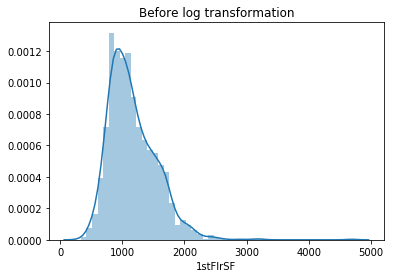

In [16]:
sns.distplot(train_sample_onehot['1stFlrSF'])
plt.title("Before log transformation")

Text(0.5, 1.0, 'After log transformation')

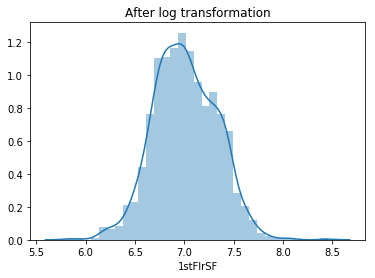

In [17]:
sns.distplot(np.log1p(train_sample_onehot['1stFlrSF']))
plt.title("After log transformation")

The 1stFlrSF feature is now  slightly normal distributed after the log transformation.

In a situation where there are negative values in our data and we want to perform transformation on it, it returns nan, this can be handled using **np.log1p(X - (min(X)-1))**.

**Timestamp handling** Some datasets contain one or more columns with date information. Usually, you will not feed that type of information directly as input to the machine learning algorithm. The reason is you don't want it to learn extremely specific patterns.
The model would be overfitting in that case and wouldn't be able to generalize to
future data. If any of our feature contains date and time of the day, we can generate feature by converting hours, minutes, etc into features using pandas manipulation techniques.  
These features may also influence our model depending on the situation. Using timestamp attributes, we can monitor customers buying pattern and use it for decision making.
The housing dataset does not contain timestamp.

In [18]:
# Code here
import datetime as dt
details = {'sales' : np.random.randint(100,613, size=10), 
        'date' : pd.date_range(start='1/1/2019', end= '24/1/2020', periods=10) }

data_with_date = pd.DataFrame(data=details)
data_with_date.head()

,sales,date
0,260,2019-01-01 00:00:00
1,423,2019-02-13 02:40:00
2,114,2019-03-28 05:20:00
3,478,2019-05-10 08:00:00
4,462,2019-06-22 10:40:00


From the dataset above, we can generate more columns like hour, day, month, year.

In [19]:
data_with_date['year'] = pd.DatetimeIndex(data_with_date['date']).year
data_with_date['month'] = pd.DatetimeIndex(data_with_date['date']).month
data_with_date['day'] = pd.DatetimeIndex(data_with_date['date']).day
data_with_date['hour'] = pd.DatetimeIndex(data_with_date['date']).hour
data_with_date.head()

,sales,date,year,month,day,hour
0,260,2019-01-01 00:00:00,2019,1,1,0
1,423,2019-02-13 02:40:00,2019,2,13,2
2,114,2019-03-28 05:20:00,2019,3,28,5
3,478,2019-05-10 08:00:00,2019,5,10,8
4,462,2019-06-22 10:40:00,2019,6,22,10


Sometimews, our data may not be a timestamp as above but specifies duration of the day. We can also generate features from it.

In [20]:
import datetime as dt
details2 = {'days' : np.random.randint(10000,61213, size=10)}
data_with_date2 = pd.DataFrame(data=details2)
data_with_date2.head()

,days
0,55190
1,48508
2,35009
3,56054
4,22851


In [21]:
data_with_date2['weeks'] = data_with_date2['days'] // 7
data_with_date2['months'] = data_with_date2['days'] // 31
data_with_date2['years'] = data_with_date2['days'] // 365
data_with_date2.head()

,days,weeks,months,years
0,55190,7884,1780,151
1,48508,6929,1564,132
2,35009,5001,1129,95
3,56054,8007,1808,153
4,22851,3264,737,62


**Automated feature engineering using feature tools**: Generating features requires domain knowledge or study about the features of the dataset. The process of manual feature engineering can be tedious as well as limited by human constraints (time and knowledge), hence we can't conceive every possible feauture that is useful.
Automated feature engineering aims to help with problem of feature creation by automatically building new features from a dataset.
l won't be covering this concept, you should probably read more on this.

#### Feature Scaling
Feature scaling enables us of have the features to be within a certain range. Features that are measured in different scales do not contribute equally to the model performance. Features with larger range of value mostly tends to have high effects on model's prediction compared with lower range features. In a situation where the correlation between the feature with high range and the target feature is low, the performance of the ML model will be low. This can be avoided by scaling the features to be within the same range.
Feature normalization and standardization are feature scaling techniques.

In feature normalization, we want to rescale the values of the feature to be within the range of 0 and 1. This can be implemented using scikit-learn MinMaxScaler. However, normalization gets easily influenced by outliers.

In [22]:
#Scaling using MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
MinMaxScaler = MinMaxScaler()

In standardization, we want to rescale the values of the feature to obtain a standard normal random variable with mean of 0 and standard deviation 1.

In [23]:
#Scaling  using StandardScaler
from sklearn.preprocessing import StandardScaler
StandardScaler = StandardScaler()

Using RobustScaler, we want to scale based on percentiles. It is not zero cenered and its standard deviation is not 1 like StandardScaler and its minimum and maximum values are not set to upper and lower boundaries like MinMaxScaler. Robust scaler is not easily influenced by outliers(It doesn't mean it is immune to it).

In [24]:
#Scaling using RobustScaler
from sklearn.preprocessing import RobustScaler
RobustScaler = RobustScaler()

There are other types of scalers, you may read up on that. For our housing data set, we will use RobustScaler.

##### Let's apply few of the above techniques on the housing dataset and check our model performance.

Handling skewed features using log transformation

In [25]:
skew_features = np.abs(data[numeric_cols].apply(lambda x: skew(x)).sort_values(ascending=False))
skew_features[:10] # Displaying top ten skewed features

LotArea          12.822431
KitchenAbvGr      4.302254
BsmtFinSF2        4.146034
EnclosedPorch     4.003891
ScreenPorch       3.946694
BsmtHalfBath      3.931148
MasVnrArea        2.602112
OpenPorchSF       2.535114
WoodDeckSF        1.842433
LotFrontage       1.563371
dtype: float64

In [26]:
# Filtering skewed features.
high_skew = skew_features[skew_features > 1]
# Taking indexes of high skew.
skew_index = high_skew.index
#Applying log transformation
for i in skew_index:
    data[i] = np.log1p(data[i])

Generating new features

In [27]:
# Creating new features  based on previous observations...
data['TotalSF'] = data['BsmtFinSF1'] + data['BsmtFinSF2'] + data['1stFlrSF'] + data['2ndFlrSF']
data['TotalBathrooms'] = data['FullBath'] + (0.5*data['HalfBath']) + data['BsmtFullBath'] + (0.5*data['BsmtHalfBath'])
data['TotalPorchSF'] = data['OpenPorchSF'] +  data['EnclosedPorch'] + data['ScreenPorch'] + data['WoodDeckSF']
data['YearBlRm'] = data['YearBuilt'] + data['YearRemodAdd']

In [28]:
# Merging quality and conditions.
data['TotalExtQual'] = data['ExterQual'] + data['ExterCond']
data['TotalBsmQual'] = data['BsmtQual'] + data['BsmtCond'] + data['BsmtFinType1'] + data['BsmtFinType2']
data['TotalGrgQual'] = data['GarageQual'] + data['GarageCond']
data['TotalQual'] = data['OverallQual'] + data['TotalExtQual'] + data['TotalBsmQual'] + data['TotalGrgQual'] + data['KitchenQual'] + data['HeatingQC']

In [29]:
# Creating new features by using new quality indicators.
data['QualGr'] = data['TotalQual'] * data['GrLivArea']
data['QualBsm'] = data['TotalBsmQual'] * (data['BsmtFinSF1'] + data['BsmtFinSF2'])
data['QualPorch'] = data['TotalExtQual'] * data['TotalPorchSF']
data['QualExt'] = data['TotalExtQual'] * data['MasVnrArea']
data['QualGrg'] = data['TotalGrgQual'] * data['GarageArea']
data['QlLivArea'] = (data['GrLivArea']  * data['TotalQual'])
data['QualSFNg'] = data['QualGr'] * data['Neighborhood']

**Binay Columns**: We also include simple feature engineering by creating binary columns for some features that can indicate the **presence(1) / absence(0)** of some features of the house

In [30]:
binary_column = ['2ndFlrSF', 'QualGrg', 'Fireplaces', 'QualBsm', 'QualPorch','TotalPorchSF']
for col in binary_column:
    col_name = 'has_'+ col
    data[col_name] = data[col].apply(lambda x: 1 if x > 0 else 0)    

In [31]:
X = data.iloc[:1460,:]
X_test = data.iloc[1460:, :]

In [32]:
X.shape, X_test.shape, y.shape

((1460, 85), (1459, 85), (1460, 1))

Fit the scaler just on training data, and then transforming it on both training and test data.
By fitting the scaler on both train and testset, we exposed ourselves to the problem of **Data Leakage**. Data Leakage is a problem when information from outside the training dataset is used to create the model. If we fit the scaler on both training and test data, our training data characteristics will contain the distribution of our testset. As such, we are unknowningly passing in information about our test data into the final training data for training, which will not give us the opportunity to truly test our model on data it has never seen before.  

In [33]:
from sklearn.preprocessing import RobustScaler

cols = X.select_dtypes(np.number).columns
scaler = RobustScaler().fit(X[cols])

In [34]:
X[cols] = scaler.transform(X[cols])
X_test[cols] = scaler.transform(X_test[cols])

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\user\Anaconda3\lib\site-packages\pandas\core\indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s
C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

S

In [35]:
X.shape

(1460, 85)

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=42)

In [37]:
# Model training

In [38]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
Rf_model = RandomForestRegressor(random_state=1)

In [39]:
# Fit the model
Rf_model.fit(X_train, y_train)

C:\Users\user\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


RandomForestRegressor(random_state=1)

In [40]:
# get predicted prices on validation data
Rf_predictions = Rf_model.predict(X_val)
print(mean_absolute_error(y_val, Rf_predictions))

16559.345456621002


In [41]:
# get predicted prices on test data
y_pred = Rf_model.predict(X_test)

In [42]:
y_pred

array([125054.34, 155400.5 , 182562.15, ..., 165596.7 , 121738.  ,
       229771.8 ])

In [43]:
pd.DataFrame(
    {"Id": test["Id"],
     "SalePrice": y_pred}
).to_csv("starter-submission9999.csv", index = False)